# Data Analysis Part 1

## Data Wrangling

### Objectives

<ul>
    <li>Handle missing values</li>
    <li>Correct data format</li>
    <li>Standardize and normalize data</li>
    <li>Binning data</li>
</ul>

<p>The purpose of data wrangling is converting data from initial format to a format that may be better for analysis</p>

#### Import data

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as pyplot
import opendatasets as od 
import os

In [25]:
dataset_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
od.download(dataset_link)

Using downloaded and verified file: .\imports-85.data


In [34]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [35]:
file = 'imports-85.data'
df = pd.read_csv(file,names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Identify and handle missing values

In [36]:
#Convert '?' to NaN in the normalized-losses column
df.replace('?',np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [42]:
#Evaluating for missing data
df.isnull().any()


symboling            False
normalized-losses     True
make                 False
fuel-type            False
aspiration           False
num-of-doors          True
body-style           False
drive-wheels         False
engine-location      False
wheel-base           False
length               False
width                False
height               False
curb-weight          False
engine-type          False
num-of-cylinders     False
engine-size          False
fuel-system          False
bore                  True
stroke                True
compression-ratio    False
horsepower            True
peak-rpm              True
city-mpg             False
highway-mpg          False
price                 True
dtype: bool

In [41]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [43]:
df.shape

(205, 26)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [74]:
#Replace the missing values by mean
#Normalized-losses variable
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print('Average of normalized losses: ', avg_norm_loss)
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)
print('Normalized-losses Missing values: ',df['normalized-losses'].isnull().any())

Average of normalized losses:  122.0
Normalized-losses Missing values:  False


In [73]:
#Replace the missing values by mean
#stroke variable
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print('Average stroke values: ', avg_stroke)
df['stroke'].replace(np.nan,avg_stroke,inplace=True)
print('Stroke Missing values: ',df['stroke'].isnull().any())

Average stroke values:  3.2568740872750674
Stroke Missing values:  False


In [72]:
#Replace the missing values by mean
#bore variable
avg_bore = df['bore'].astype('float').mean(axis=0)
print('Average bore: ', avg_bore)
df['bore'].replace(np.nan, avg_bore,inplace=True)
print('Bore Missing values: ' , df['bore'].isnull().any())

Average bore:  3.33069156704042
Bore Missing values:  False


In [71]:
#Replace the missing values by mean
#horsepower variable
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print('Average horsepower: ', avg_horsepower)
df['horsepower'].replace(np.nan,avg_horsepower,inplace=True)
print('Horsepower Missing values: ', df['horsepower'].isnull().any())

Average horsepower:  103.40553390682057
Horsepower Missing values:  False


In [70]:
#Replace the missing values by mean
#peakRpm variable
avg_peak_rpm = df['peak-rpm'].astype('float').mean(axis=0)
print('Average peak-rpm: ',avg_peak_rpm)
df['peak-rpm'].replace(np.nan,avg_peak_rpm,inplace=True)
print('Peak-rpm Missing values: ', df['peak-rpm'].isnull().any())

Average peak-rpm:  5117.665367742568
Peak-rpm Missing values:  False


In [69]:
#Replace the missing values by most common type in the columns
#num-of-doors variable
print(df['num-of-doors'].value_counts())
print('Most common type of doors: ', df['num-of-doors'].value_counts().idxmax())
df['num-of-doors'].replace(np.nan,'four',inplace=True)
print('Num-of-Doors Missing values: ', df['num-of-doors'].isnull().any())

num-of-doors
four    115
two      86
Name: count, dtype: int64
Most common type of doors:  four
Num-of-Doors Missing values:  False


In [67]:
#Drop the rows for missing values
#Price variable
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True,inplace=True)
print('Price Missing values: ', df['price'].isnull().any())

Price Missing values:  False


#### Correct data format

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

In [77]:
df[['bore','stroke','price','peak-rpm']] = df[['bore','stroke','price','peak-rpm']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int32  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non

#### Data Standardization

<p>Standardization is the process of transforming data into a common format, allowing to kame the meaningful comparison</p>

In [81]:
df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']

#### Data Normalization

<p>Normalization is the process of transforming values of several variables intro a similar range. Typical normalizations include scaling the variable into a range from 0 to 1.</p>

In [83]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330692,3.256874,10.164279,5117.665368,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,478.113805,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [84]:
df['length']=df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

#### Binning

<p>Binning is the process of transformation continuos numerical variables intro discrete categorical 'bins' for grouped analysis</p>

In [89]:
#Binning horsepower, peak-rpm, and compression-ratio
df['horsepower']=df['horsepower'].astype(int,copy=True)
df['peak-rpm'] = df['peak-rpm'].astype(int,copy=True)
df['compression-ratio'] = df['compression-ratio'].astype(int,copy=True)

Text(0.5, 1.0, 'horsepower bins')

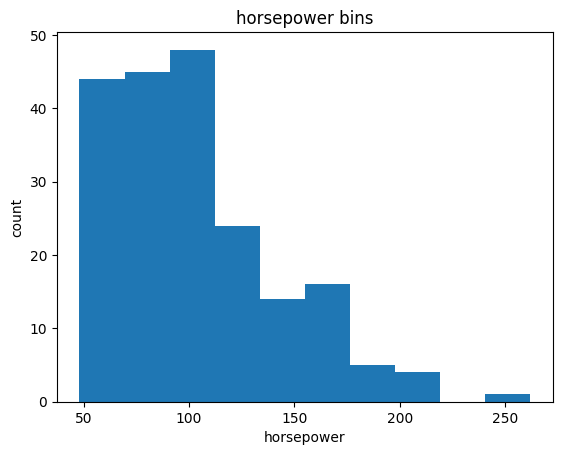

In [96]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

In [97]:
bins = np.linspace(min(df['horsepower']),max(df['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [98]:
group_names = ['Low','Medium','High']

In [101]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower','horsepower-binned']].head()

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


In [102]:
df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

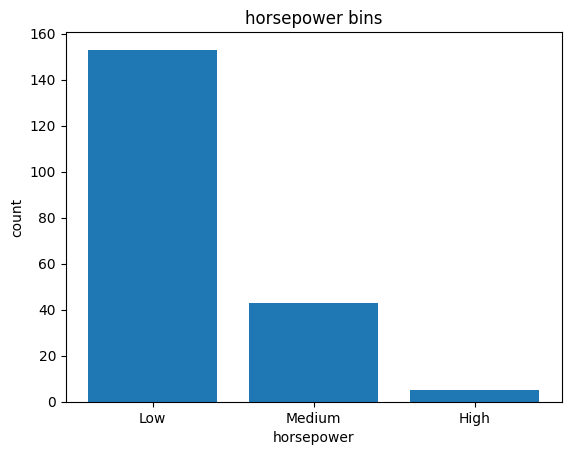

In [103]:
%matplotlib inline
import matplotlib as plt 
from matplotlib import pyplot 
pyplot.bar(group_names,df['horsepower-binned'].value_counts())

plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

##### Bins visualization

Text(0.5, 1.0, 'horsepower bins')

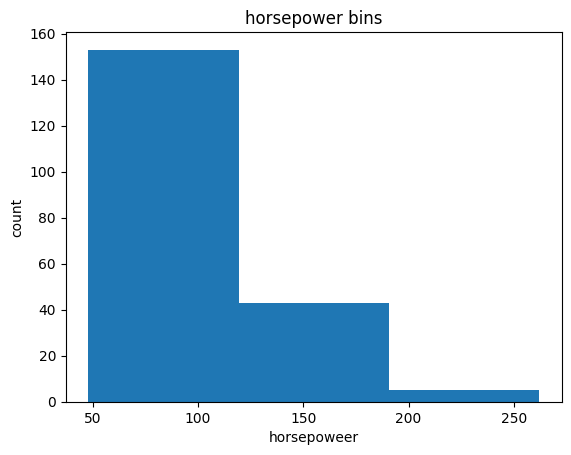

In [104]:
%matplotlib inline
import matplotlib as plt 
from matplotlib import pyplot 

plt.pyplot.hist(df['horsepower'], bins=3)
plt.pyplot.xlabel('horsepoweer')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

### Indicator Variable (Dummy Variable)

In [105]:
dummy_var_1 = pd.get_dummies(df['fuel-type'])
dummy_var_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [110]:
dummy_var_1.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_var_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [107]:
dummy_var_1.replace(False,0,inplace=True)
dummy_var_1.replace(True,1,inplace=True)
dummy_var_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [111]:
df= pd.concat([df,dummy_var_1], axis=1)
df.drop('fuel-type', axis=1, inplace=True)

In [112]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500,18,22,17450.0,13.055556,10.681818,Low,0,1


In [113]:
dummy_var_2 = pd.get_dummies(df['aspiration'])
dummy_var_2.head()

,std,turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [114]:
dummy_var_2.replace(False,0,inplace=True)
dummy_var_2.replace(True,1,inplace=True)

In [115]:
df['aspiration'].value_counts()

aspiration
std      165
turbo     36
Name: count, dtype: int64

In [116]:
dummy_var_2.rename(columns={'std': 'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
dummy_var_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [121]:
df = pd.concat([df,dummy_var_2],axis=1)
df.drop('aspiration', axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [123]:
df.to_csv('clean_df.csv')